In [123]:
import pandas as pd # type: ignore
from wordcloud import WordCloud, STOPWORDS # type: ignore
import pandas as pd # type: ignore
import re
from textblob import TextBlob# type: ignore
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore
import  # type: ignore
from nltk.corpus import stopwords # type: ignore

In [124]:
trump = pd.read_csv("/Trumpall2.csv") # Skip the first 10 rows


biden = pd.read_csv("/Bidenall2.csv")

In [125]:
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [126]:
biden.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [127]:
from textblob import TextBlob # type: ignore

In [128]:
trump_txt = TextBlob(trump['text'][100])
print(trump['text'][100])
print('trump',trump_txt.sentiment)

print()
biden_txt = TextBlob(biden['text'][100])
print(biden['text'][100])
print('biden',biden_txt.sentiment)

 Thank you President Trump for all you are doing to help the American people. First President in hi… https://t.co/MndKc1gtJB
trump Sentiment(polarity=0.125, subjectivity=0.16666666666666666)

@JoeBiden On November 3rd, Democrats are going to set post offices on fire. Democrats know Joe will lose the election. #Trump2020Landslide
biden Sentiment(polarity=0.0, subjectivity=0.0)


In [129]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet


In [130]:
def remove_stopwords(tweet):
    tokens = tweet.split()
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

In [138]:
def pol(text):
  return TextBlob(text).sentiment.polarity

trump['polarity'] = trump['text'].apply(pol)
biden['polarity'] = biden['text'].apply(pol)

In [139]:
trump.head()

,user,text,Polarity,polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00,0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50,-0.50
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50,0.50
4,James09254677,After 4 years you think you would have figure...,0.00,0.00


In [140]:
trump['sentiment'] = np.where(trump['polarity'] > 0, 'positive', 'negative')
trump['sentiment'][trump['polarity'] == 0]='neutral'

biden['sentiment'] = np.where(biden['polarity'] > 0, 'positive', 'negative')
biden['sentiment'][biden['polarity'] == 0]='neutral'

<ipython-input-140-728b7a7bd055>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-140-728b7a7bd055>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
trump.tail()

,user,text,Polarity,polarity,sentiment
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,0.000,neutral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,0.000,neutral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,0.225,positive
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,0.000,neutral
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500,-0.500,negative


In [143]:
biden.head()

,user,text,Polarity,polarity,sentiment
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,0.00,neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,0.00,neutral
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,0.00,neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,0.05,positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,0.00,neutral


In [144]:
trump_neutral = trump[trump['polarity'] == 0]
print(trump_neutral.shape)


biden_neutral = biden[biden['polarity'] == 0]
print(biden_neutral.shape)


(1464, 5)
(1509, 5)


In [145]:
print(trump.shape)
print(biden.shape)

(2788, 5)
(2540, 5)


In [146]:
trump['candidate'] = 'Trump'
biden['candidate'] = 'Biden'

In [147]:
tweets_df = pd.concat([trump, biden], ignore_index=True)

In [148]:
tweets_df.tail(15)

,user,text,Polarity,polarity,sentiment,candidate
5313,mutt1960,@JoeBiden Nap time Joe?,0.000000,0.000000,neutral,Biden
5314,dorthealynn,"@JoeBiden Mr. President, you warned us. https...",0.000000,0.000000,neutral,Biden
5315,MediciWriter,@JoeBiden Correct! Washington DC politics is w...,-0.062500,-0.062500,negative,Biden
5316,Melissa52727895,@JoeBiden No fuel just truth..... The year is ...,0.000000,0.000000,neutral,Biden
5317,SuperMutant2099,@JoeBiden https://t.co/EHfzg4NqM8,0.000000,0.000000,neutral,Biden
5318,harrigill,@JoeBiden Don't you have someone's hair to sniff?,0.000000,0.000000,neutral,Biden
5319,bernard_a81,@JoeBiden Mr.B7den - what are you doing about ...,0.000000,0.000000,neutral,Biden
5320,Gypsy0112,@JoeBiden The only you can do to calm the wat...,0.150000,0.150000,positive,Biden
5321,CranstonMalcolm,@JoeBiden https://t.co/NJWhlsDTCY,0.000000,0.000000,neutral,Biden
5322,virgil_merchant,@JoeBiden fire is the last thing our country n...,0.142857,0.142857,positive,Biden


In [149]:
topics = {
    'economy': ['economy', 'economic', 'jobs', 'employment', 'market', 'stock', 'finance'],
    'healthcare': ['healthcare', 'health', 'hospital', 'doctor', 'nurse', 'medicare', 'insurance'],
    'immigration': ['immigration', 'immigrant', 'border', 'visa', 'refugee', 'asylum', 'deportation']
}

In [150]:
def categorize_topic(tweet, topics):
    for topic, keywords in topics.items():
        if any(keyword in tweet.lower() for keyword in keywords):
            return topic
    return 'other'

tweets_df['topic'] = tweets_df['text'].apply(lambda tweet: categorize_topic(tweet, topics))

In [151]:
import pandas as pd
import re
from textblob import TextBlob
import plotly.express as px
import plotly.graph_objects as go
import nltk

topic_sentiment = tweets_df[tweets_df['topic'] != 'other'].groupby(['topic', 'candidate', 'sentiment']).size().reset_index(name='counts')

# Pivot the data for easier plotting
pivot_df = topic_sentiment.pivot_table(index=['topic', 'candidate'], columns='sentiment', values='counts', fill_value=0)

# Calculate percentages
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df['positive'] = (pivot_df['positive'] / pivot_df['total']) * 100
pivot_df['neutral'] = (pivot_df['neutral'] / pivot_df['total']) * 100
pivot_df['negative'] = (pivot_df['negative'] / pivot_df['total']) * 100
pivot_df = pivot_df.reset_index()

print(pivot_df)

fig = go.Figure()

topics = pivot_df['topic'].unique()

for topic in topics:
    df_biden = pivot_df[(pivot_df['topic'] == topic) & (pivot_df['candidate'] == 'Biden')]
    df_trump = pivot_df[(pivot_df['topic'] == topic) & (pivot_df['candidate'] == 'Trump')]

    fig.add_trace(go.Bar(
        x=['Positive', 'Neutral', 'Negative'],
        y=[df_biden['positive'].values[0], df_biden['neutral'].values[0], df_biden['negative'].values[0]],
        name=f'Biden - {topic}',
        marker_color='blue'
    ))

    fig.add_trace(go.Bar(
        x=['Positive', 'Neutral', 'Negative'],
        y=[df_trump['positive'].values[0], df_trump['neutral'].values[0], df_trump['negative'].values[0]],
        name=f'Trump - {topic}',
        marker_color='red'
    ))

fig.update_layout(barmode='group', title='Sentiment Distribution by Topic and Candidate', xaxis_title='Sentiment', yaxis_title='Percentage')
fig.show()

sentiment        topic candidate   negative     neutral   positive  total
0              economy     Biden  26.315789   52.631579  21.052632     19
1              economy     Trump  20.588235   38.235294  41.176471     34
2           healthcare     Biden  13.698630   61.643836  24.657534     73
3           healthcare     Trump  46.666667   33.333333  20.000000     15
4          immigration     Biden   0.000000   66.666667  33.333333      6
5          immigration     Trump   0.000000  100.000000   0.000000      1


In [152]:
sentiment_distribution = tweets_df.groupby(['candidate', 'sentiment']).size().reset_index(name='counts')

# Pivot the data for easier calculation
pivot_df = sentiment_distribution.pivot_table(index='candidate', columns='sentiment', values='counts', fill_value=0)

# Calculate percentages
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df['positive'] = (pivot_df['positive'] / pivot_df['total']) * 100
pivot_df['neutral'] = (pivot_df['neutral'] / pivot_df['total']) * 100
pivot_df['negative'] = (pivot_df['negative'] / pivot_df['total']) * 100

# Reset index for plotting
pivot_df = pivot_df.reset_index()

print(pivot_df)

# Visualize sentiment distribution
fig = go.Figure()

candidates = pivot_df['candidate'].unique()

for candidate in candidates:
    df = pivot_df[pivot_df['candidate'] == candidate]

    fig.add_trace(go.Bar(
        x=['Positive', 'Neutral', 'Negative'],
        y=[df['positive'].values[0], df['neutral'].values[0], df['negative'].values[0]],
        name=candidate,
        marker_color='blue' if candidate == 'Biden' else 'red'
    ))

fig.update_layout(barmode='group', title='Sentiment Distribution by Candidate', xaxis_title='Sentiment', yaxis_title='Percentage')
fig.show()

sentiment candidate   negative    neutral   positive  total
0             Biden  16.023622  59.409449  24.566929   2540
1             Trump  21.413199  52.510760  26.076040   2788


In [163]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):

    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    tweet = re.sub(r'\@\w+|\#', '', tweet)

    tweet = tweet.lower()

    tweet = re.sub(r'\W', ' ', tweet)

    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

def remove_stopwords(tweet):

    tokens = tweet.split()

    filtered_words = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_words)

# Apply the preprocessing functions
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet).apply(remove_stopwords)

# Display the first few rows of the DataFrame to check the new column
print(tweets_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              user                                               text  \
0      manny_rosen   @sanofi please tell us how many shares the Cr...   
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...   
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...   
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...   
4    James09254677   After 4 years you think you would have figure...   

   Polarity  polarity sentiment candidate  topic  \
0      0.05      0.05  positive     Trump  other   
1      0.00      0.00   neutral     Trump  other   
2     -0.50     -0.50  negative     Trump  other   
3      0.50      0.50  positive     Trump  other   
4      0.00      0.00   neutral     Trump  other   

                                        cleaned_text  
0  please tell us many shares criminal trump ente...  
1  like comment rt prayer4tachantitans prayer4tac...  
2  ag barr useless amp corrupt rep pramila jayapa...  
3  mr trump wake comments tw

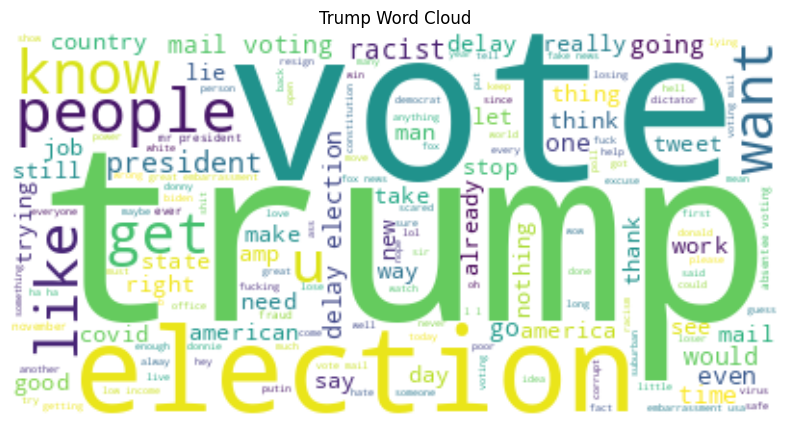

In [166]:
# Generate word cloud for Trump
trump_text = ' '.join(tweets_df[tweets_df['candidate'] == 'Trump']['cleaned_text'])
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(trump_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trump Word Cloud')
plt.show()



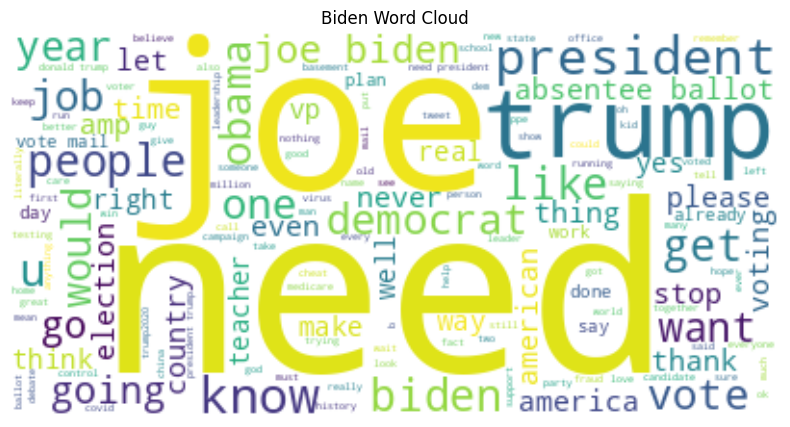

In [167]:

biden_text = ' '.join(tweets_df[tweets_df['candidate'] == 'Biden']['cleaned_text'])
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(biden_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Biden Word Cloud')
plt.show()


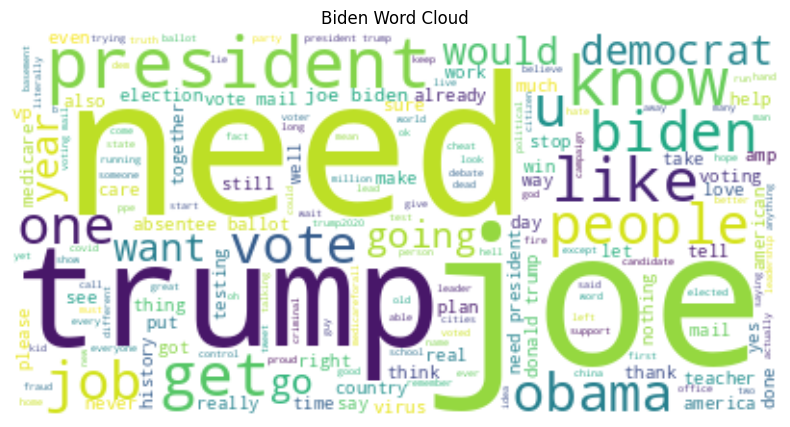

In [168]:
# Generate word cloud for Biden
biden_text = ' '.join(tweets_df[tweets_df['candidate'] == 'Biden']['cleaned_text'])
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(biden_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Biden Word Cloud')
plt.show()


<Axes: title={'center': 'Top 10 Words in Biden Tweets'}, xlabel='word'>

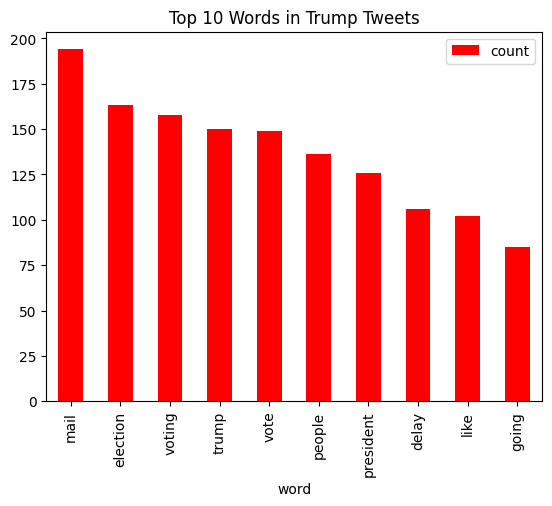

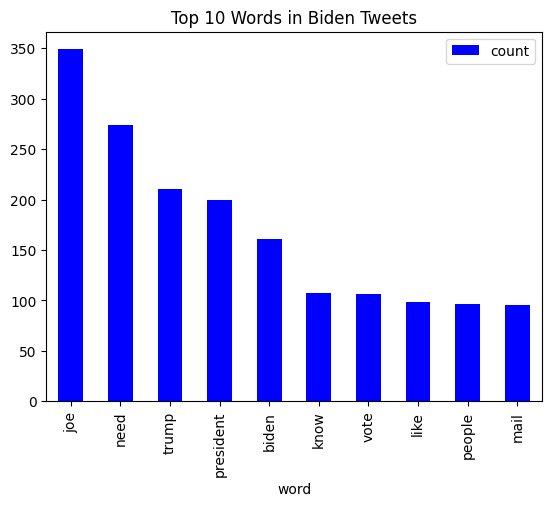

In [170]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Most frequent words for Trump
trump_words = get_top_n_words(tweets_df[tweets_df['candidate'] == 'Trump']['cleaned_text'], 10)
trump_df = pd.DataFrame(trump_words, columns = ['word', 'count'])
trump_df.plot.bar(x='word', y='count', color='red', title='Top 10 Words in Trump Tweets')

# Most frequent words for Biden
biden_words = get_top_n_words(tweets_df[tweets_df['candidate'] == 'Biden']['cleaned_text'], 10)
biden_df = pd.DataFrame(biden_words, columns = ['word', 'count'])
biden_df.plot.bar(x='word', y='count', color='blue', title='Top 10 Words in Biden Tweets')


In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
# Select a single column from y_train
y = tweets_df['sentiment']

x=tfidf.fit_transform(tweets_df.text)

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [179]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min finished


In [180]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7346096096096096


In [181]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))